`NOTE: This document will include plots, data, and code-snippets. (It will probably be a bit messy)`

# Libraries

In [32]:
source("tools.R")

Parsed with column specification:
cols(
  .default = col_double(),
  userId = col_character(),
  age = col_character(),
  datetime = col_character(),
  gender = col_character(),
  datetime_1 = col_character(),
  stage = col_integer(),
  scenario = col_character(),
  subcondition = col_integer(),
  pageIndex = col_integer(),
  noiseIndex = col_integer(),
  day0 = col_character(),
  day1 = col_character(),
  day2 = col_character(),
  day3 = col_character(),
  day4 = col_character(),
  day5 = col_character(),
  day6 = col_character(),
  day7 = col_character(),
  day8 = col_character(),
  day9 = col_character()
  # ... with 69 more columns
)
See spec(...) for full column specifications.
Warning message in eval(substitute(expr), envir, enclos):
"NAs introduced by coercion"

# Figure of trend damping (quintessential example)

In [33]:
n_points <- 30

x <- 1:n_points

y <- 1:n_points
y <- jitter(y, factor = 30)

data_pos <- data.frame(x, y =  y)
data_neg <- data.frame(x, y = -y)

In [34]:
linear <- function(x) { x }

In [35]:
linear_neg <- function(x) { -x }

In [36]:
max_v <- 45

In [37]:
# Logistic function
L  <- 45
x0 <- 10 #midpoint value
k  <- 0.10

func <- function(x) { (L / (1 + exp(-k*(x - x0)))) - 12 }

In [106]:
# Plot
p1 <- ggplot(data=data_pos, aes(x=x, y=y)) +
            stat_function(fun = linear, colour = "black", lty="dashed", alpha=0.6) +
            stat_function(fun = func, colour = "black", lty="solid", alpha=0.6) +
            geom_point(shape=21, size=4) +

            # Axes
            coord_cartesian(ylim=c(1, max_v)) + 
            scale_x_continuous(limits = c(1, max_v)) + 
            #scale_y_continuous(limits = c(0, 40)) + 

            # Theme
            theme_bw() + 
            ggthemes::theme_few() + 
            theme(text = element_text(size=12, family="serif")) +
            theme(plot.title = element_text(hjust = 0.5)) +
            theme(  axis.title.x = element_blank(),
                    axis.text.x  = element_blank(),
                    #axis.ticks.x = element_blank(),
                    axis.title.y = element_blank(),
                    axis.text.y  = element_blank(),
                    #axis.ticks.y = element_blank()
                 )

In [107]:
# Logistic function
L_  <- 35
x0_ <- 10 #midpoint value
k_  <- 0.1

func_ <- function(x) { - ((L_ / (1 + exp(-k_ *(x - x0_)))) - 9 )}

In [108]:
# Plot
p2<- ggplot(data=data_neg, aes(x=x, y=y)) +
            stat_function(fun = linear_neg, colour = "black", lty="dashed", alpha=0.6) +
            stat_function(fun = func_, colour = "black", lty="solid", alpha=0.6) +
            geom_point(shape=21, size=4) +

            # Axes
            coord_cartesian(ylim=c(-1, -max_v)) + 
            scale_x_continuous(limits = c(1, max_v)) + 
            #scale_y_continuous(limits = c(0, 40)) + 

            # Theme
            theme_bw() + 
            ggthemes::theme_few() + 
            theme(text = element_text(size=12, family="serif")) +
            theme(plot.title = element_text(hjust = 0.5)) +
            theme(  axis.title.x = element_blank(),
                    axis.text.x  = element_blank(),
                    #axis.ticks.x = element_blank(),
                    axis.title.y = element_blank(),
                    axis.text.y  = element_blank(),
                    #axis.ticks.y = element_blank()
                 )

In [116]:
pdf("Images/paper_images/trend_damping_explanation.pdf", width=8, height=3.0)
multiplot(p1, p2, cols=2)
dev.off()

png 
  2

# Real-world data

We have to get real world data for six scenarios. The state of each one currently is:

DONE:
- `Temperature: wunderground`
- `Rain: wunderground`
- `Gym members: https://trends.google.com/trends/explore?date=today%205-y&geo=GB&q=gym`
- `Sales: https://www.ons.gov.uk/businessindustryandtrade/retailindustry/timeseries/j43s/drsi`
- `Salary: http://www.hamiltonproject.org/charts/career_earnings_by_college_major/  <- Median annual earnings over career`
- `Facebook friends (US and Canada): https://www.statista.com/statistics/247614/number-of-monthly-active-facebook-users-worldwide/`

Sales: 
- Title	RSI:Value Not seasonally Adjusted:All Retailers ex fuel:All Business Index
- CDID	J43S
- Source dataset ID	DRSI
- PreUnit	
- Unit	
- Release date	20-09-17
- Next release	19-Oct-17


# Save my Facebook data:

In [ ]:
fbqv <- read_csv ('data/real-world/3- for_compositional_analysis/facebook_qv.csv')

fbqv <- fbqv %>% 
        group_by(Trimester) %>%
        summarize(added_trimester = sum(added))

fbqv <- within(fbqv, accum <- cumsum(added_trimester))

write.table(fbqv, file = "data/real-world/4- for_compositional_analysis/facebook_qv.csv",row.names=TRUE, col.names=TRUE, na="", sep=",")

## Temperature

In [11]:
weather <- read_csv("data/real-world/2- filtered_and_transformed/weather.csv")

weather$temp_high <- as.numeric(weather$temp_high)

Parsed with column specification:
cols(
  .default = col_integer(),
  `Wind low` = col_character(),
  precipitation_sum_mm = col_double(),
  Events = col_character()
)
See spec(...) for full column specifications.


In [12]:
weather$year_month <- ifelse(nchar(weather$month) == 1,
                           paste0(weather$year, ' 0', weather$month), 
                           paste0(weather$year,  ' ', weather$month))

In [13]:
weather_data <- weather %>%
                    group_by(year_month) %>%
                    summarize(temperature_mean = mean(temp_high))

p <- weather_data %>%
     ggplot(aes(x=year_month, y=temperature_mean, group=1)) +
        geom_line() +
        theme(axis.text.x = element_text(angle = 90, hjust = 1))

if(FALSE) {
    # Save image
    svg("data/real-world/images/weather.svg", width=8, height=4)
    p
    dev.off()

    # Save csv
    colnames(weather_data) = c('x', 'y')
    write.csv(weather_data, file = "data/real-world/3- for_compositional_analysis/temperature.csv")
}

## Rain

Non-moving window: probability of event

In [14]:
weather$rain <- grepl("Rain", weather$Events)

In [44]:
weather$week <- floor((weather$day_n-1) / 7) + 1

In [39]:
weather$trimester_n <- floor((weather$month) / 4) + 1
weather$year_trimester <- paste(weather$year, weather$trimester_n)

weather$semester_n <- floor((weather$month) / 7) + 1
weather$year_semester <- paste(weather$year, weather$semester_n)

#weather %>% select(year, month, semester_n) %>% unique

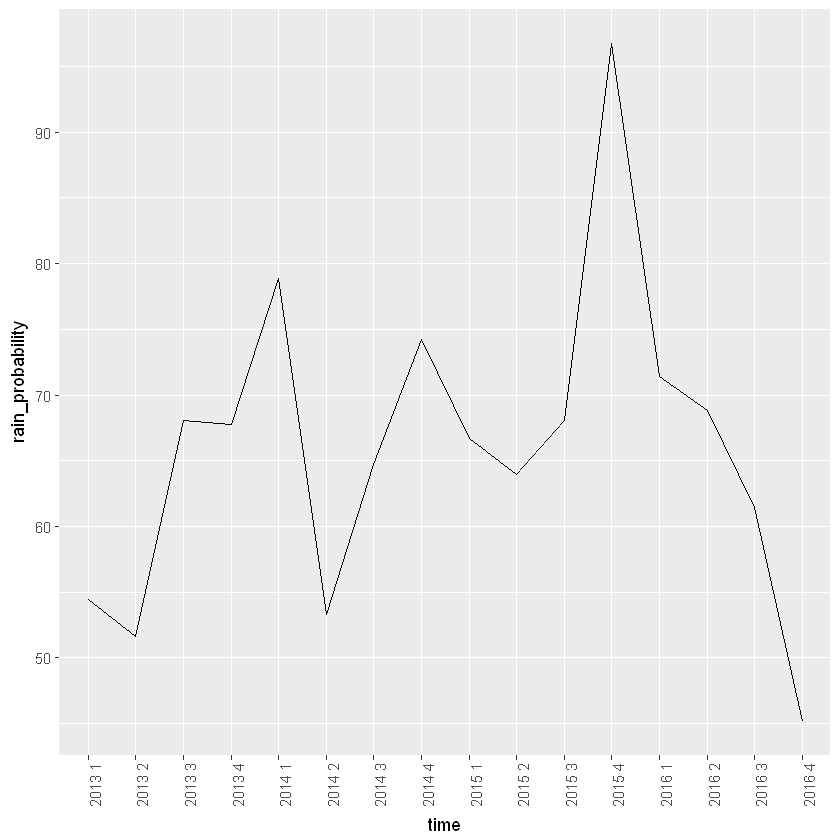

In [40]:
rain_data <- weather %>%
                #group_by(year_month) %>%
                group_by(time=year_trimester) %>%
                summarize(rain_probability = sum(rain)/length(rain) * 100)

p <- rain_data %>%
    ggplot(aes(x=time, y=rain_probability, group=1)) +
        geom_line()  +
        theme(axis.text.x = element_text(angle = 90, hjust = 1))

if (FALSE){
    # Image
    svg("data/real-world/images/rain_probability.svg", width=8, height=4)
    p
    dev.off()

    # CSV
    colnames(rain_data) = c('x', 'y')
    write.csv(rain_data, file = "data/real-world/3- for_compositional_analysis/rain.csv")   
}
p

In [ ]:
rain_data <- weather %>%
                #group_by(year_month) %>%
                group_by(time=year_trimester) %>%
                summarize(rain_probability = sum(rain)/length(rain) * 100)

p <- rain_data %>%
    ggplot(aes(x=time, y=rain_probability, group=1)) +
        geom_line()  +
        theme(axis.text.x = element_text(angle = 90, hjust = 1))

if (FALSE){
    # Image
    svg("data/real-world/images/rain_probability.svg", width=8, height=4)
    p
    dev.off()

    # CSV
    colnames(rain_data) = c('x', 'y')
    write.csv(rain_data, file = "data/real-world/3- for_compositional_analysis/rain.csv")   
}
p

Non-moving window: precipitation sum

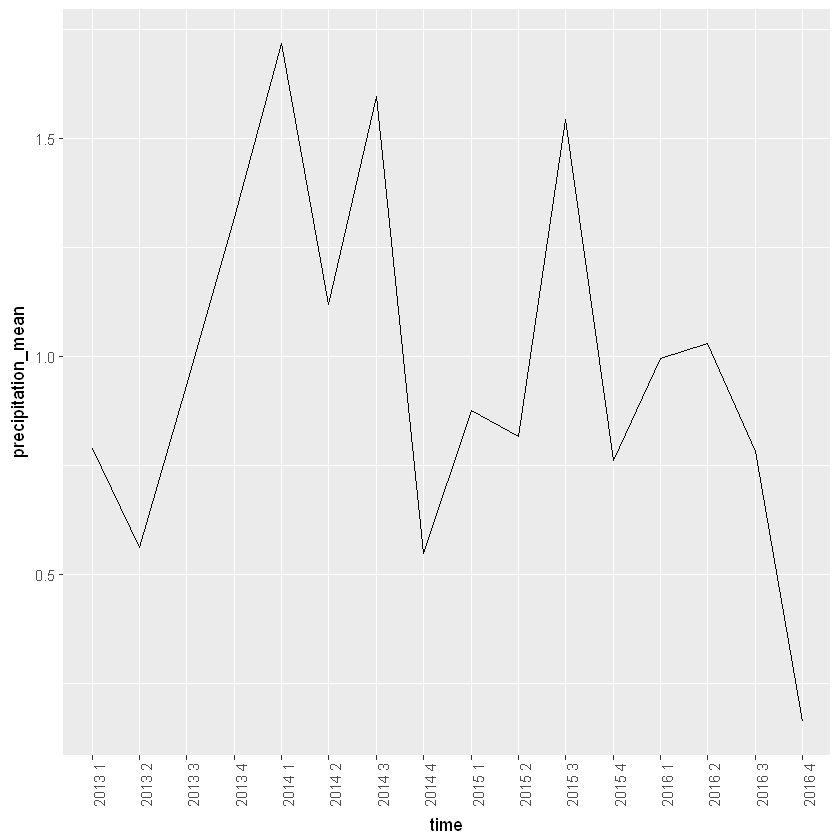

In [37]:
p <- weather %>%
        #group_by(time = year_month) %>%
        group_by(time = year_trimester) %>%
        summarize(precipitation_mean = mean(precipitation_sum_mm)) %>%

     ggplot(aes(x=time, y=precipitation_mean, group=1)) +
        geom_line() +
        theme(axis.text.x = element_text(angle = 90, hjust = 1))

#svg("data/real-world/images/precipitation.svg", width=8, height=4)
p
#dev.off()

## Salary

In [56]:
salary <- read_csv("data/real-world/2- filtered_and_transformed/salary.csv")

Parsed with column specification:
cols(
  id = col_integer(),
  year_n = col_integer(),
  age_us = col_integer(),
  age_uk = col_integer(),
  usd_per_year = col_integer(),
  year = col_integer()
)


In [71]:
salary_data <- salary %>%
                    filter(age_uk >= 25 & age_uk <= 28)

p <- salary_data %>%
        ggplot(aes(x=age_uk, y=usd_per_year, group=1)) +
            geom_line()

# Image
svg("data/real-world/images/salary.svg", width=8, height=4)
p
dev.off()

# CSV
to_save <- data.frame(salary_data$year, salary_data$usd_per_year)

colnames(to_save) = c('x', 'y')

to_save$x <- paste(to_save$x, '01')

write.csv(to_save, file = "data/real-world/3- for_compositional_analysis/salary.csv")

png 
  2

## Sales

In [82]:
sales <- read_csv("data/real-world/2- filtered_and_transformed/sales.csv")

Parsed with column specification:
cols(
  id = col_integer(),
  Year = col_integer(),
  Month = col_integer(),
  Value = col_double()
)


In [89]:
sales_data <- data.frame(x= paste(sales$Year, sales$Month), y=sales$Value)

sales_data$x <- ifelse(nchar(sales$Month) == 1,
                           paste0(sales$Year, ' 0', sales$Month), 
                           paste0(sales$Year,  ' ', sales$Month))

p <- sales_data %>%
        ggplot(aes(x=x, y=y, group=1)) +
            geom_line() +
            theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Image
svg("data/real-world/images/sales.svg", width=8, height=4)
p
dev.off()

# CSV
write.csv(sales_data, file = "data/real-world/3- for_compositional_analysis/sales.csv")

png 
  2

## Gym members

In [66]:
gym <- read_csv("data/real-world/2- filtered_and_transformed/gym.csv")

Parsed with column specification:
cols(
  id = col_integer(),
  week = col_character(),
  gym_uk = col_integer(),
  day = col_integer(),
  month = col_integer(),
  year = col_integer(),
  days_n = col_character()
)


In [67]:
gym$day <- substr(gym$week, 1, 2)

gym$month <- substr(gym$week, 4, 5)

gym$year <- paste0(20, substr(gym$week, 7, 8))

gym$year_month <- paste(gym$year, gym$month)

In [73]:
gym_data <- gym %>%
        filter(year >= 2013 & year <= 2016) %>%
            group_by(year_month) %>%
            summarize(gym_uk_mean = mean(gym_uk))

p <- gym_data %>%
         ggplot(aes(x=year_month, y=gym_uk_mean, group=1)) +
            geom_line() +
            theme(axis.text.x = element_text(angle = 90, hjust = 1))

# Graph
svg("data/real-world/images/gym.svg", width=8, height=4)
p
dev.off()

# CSV
colnames(gym_data) = c('x', 'y')
write.csv(gym_data, file = "data/real-world/3- for_compositional_analysis/gym.csv")

png 
  2

## Facebook friends

In [74]:
facebook <- read_csv("data/real-world/2- filtered_and_transformed/facebook.csv")

facebook$year_quarter <- paste(facebook$year, facebook$quarter)

Parsed with column specification:
cols(
  id = col_integer(),
  year = col_integer(),
  quarter = col_character(),
  users_millions = col_integer(),
  quarter_n = col_integer(),
  days_n = col_character()
)


In [76]:
p <- facebook %>%
        ggplot(aes(x=year_quarter, y=users_millions, group=1)) +
            geom_line() +
            theme(axis.text.x = element_text(angle = 90, hjust = 1))


# Image
svg("data/real-world/images/facebook.svg", width=8, height=4)
p
dev.off()

# CSV
to_save <- data.frame(facebook$year_quarter, facebook$users_millions)

colnames(to_save) = c('x', 'y')

write.csv(to_save, file = "data/real-world/3- for_compositional_analysis/facebook.csv")

png 
  2

# Trash

In [2]:
f <- c("¿De cuándo acá ha de ser el autor de un libro el que mejor lo entienda? (Cada cual es como le hacen, y cada uno con su cada una. (Miguel De Unamuno)",
"«Dime lo que lees y te diré quién eres», eso es verdad, pero te conoceré mejor si me dices lo que relees. (François Mauriac)",
"A un poeta manso no se le puede llamar poeta. (Vladimir Maiakovski)",
"Adquirir el hábito de la lectura es construirse un refugio contra casi todas las miserias de la vida. (William S. Maugham)",
"Al verme de mis libros rodeado, no envidio más riqueza ni otro estado. (Luis Carlos Viada Y Lluch)",
"Algún mal escritor al juicio apela de la posteridad, y se consuela. (Tomás De Iriarte)",
"Algunos libros son inmerecidamente olvidados; ninguno es inmerecidamente recordado. (Wystan H. Auden)",
"Amar la lectura es trocar horas de hastío por horas deliciosas. (Montesquieu)",
"Amigo de los amigos, huésped de predilección, eres amigo y maestro, confidente y confesor; compañero en las vigilias, en la pereza aguijón; en la soledad, recreo, y en los caminos mentor. (Serafín Y Joaquín Álvarez Quintero)",
"Aunque soy hombre de letras, no debéis suponer que no he intentado ganarme la vida honradamente. (George Bernard Shaw)",
"Con buenos pensamientos puede hacerse pésima literatura. (André Gide)",
"Contratar a alguien para que escriba nuestra autobiografía es como pagar a alguien para que se bañe por nosotros. (Mae West)",
"Cuando era joven leía casi siempre para aprender; hoy, a veces, leo para olvidar. (Giovanni Papini)",
"Cuando oigo decir que un hombre tiene el hábito de la lectura, estoy predispuesto a pensar bien de él. (Nicolás De Avellaneda)",
"Cuanto más se lee, menos se imita. (Jules Renard)",
"Debemos usar un libro como las abejas las flores: para absorber su esencia. (Charles C. Colton)",
"Dios ponga a mi alcance libros, aunque viva prisionero; asomado a esas ventanas, no me acobardan encierros. (Eduardo Marquina)",
"El arte de escribir consiste en el arte de interesar. (Jacques Delille)",
"El buen lector es el que hace el libro bueno. (Ralph W. Emerson)",
"El buen libro, de las penas es alivio. (Anónimo)",
"El camino de la ignorancia está empedrado de buenas ediciones. (George Bernard Shaw)",
"El destino de muchos hombres dependió de haber o no haber habido una biblioteca en su casa paterna. (Edmondo De Amicis)",
"El escritor es un ingeniero del alma humana. (Stalin)",
"El estilo, como las uñas, es más fácil tenerlo brillante que limpio. (Eugenio D'Ors)",
"El hambre hace salir del bosque al lobo, y del arte al escritor. (Fernand Vanderem)",
"El hombre que escribe oscuro no puede hacerse ilusiones: o se engaña, o trata de engañar a los demás. (Stendhal)",
"El leer sin pensar nos hace una mente desordenada. El pensar sin leer nos hace desequilibrados. (Confucio)",
"El libro es fuerza, es valor, es poder, es alimento; antorcha del pensamiento, y manantial del amor. (Rubén Darío)",
"El libro es una pértiga que permite dar saltos inimaginables en el espacio y en el tiempo; el testigo de la más hermosa carrera de relevos; un infalible e íntimo amigo silencioso. (Antonio Gala)",
"El libro es una voz viviente. Es una inteligencia que nos habla y que escuchamos. (Samuel Smiles)",
"El libro que no se dirija a la mayoría, en número e inteligencia, es un libro tonto. (Charles Baudelaire)",
"El libro que no soporta dos lecturas no merece ninguna. (José Luis Martín Descalzo)",
"El mayor encanto de la literatura es que humaniza el amor. (André Maurois)",
"El mundo está lleno de libros preciosos, que nadie lee. (Umberto Eco)",
"El poeta que estuviera satisfecho del mundo en que vive, no sería poeta. (Giovanni Papini)",
"El primer principio para escribir es pensar bien. Borra a menudo si quieres escribir cosas que sean dignas de ser leídas. (Horacio)",
"El que lee mucho intentará algún día escribir. (William Cowper)",
"El que lee mucho y anda mucho, va mucho y sabe mucho. (Miguel De Cervantes)",
"El ver mucho y el leer mucho aviva los ingenios de los hombres. (Miguel De Cervantes)",
"Elegir la lectura es tan necesario como elegir los alimentos. (ohn Ruskin)",
"En la lectura deben cuidarse dos cosas: escoger bien los libros y leerlos bien. Nunca deben leerse libros que extravíen el entendimiento o corrompan el corazón. (Jaime Balmes)",
"En la triste senectud sólo distraen el ánimo estas tres cosas: los libros, el sol y las flores. En mi biblioteca encuentro antídotos contra la desesperanza, el dolor, la tristeza y el tedio. (Santiago Ramón Y Cajal)",
"Es imposible ser un buen poeta sin ser un buen hombre. (Ben Jonson)",
"Es más fácil quedarse con un libro que con su contenido. (Bernard B. De Fontenelle)",
"Es un error creer que siempre van a existir los libros. La raza humana no los ha necesitado durante millares de años; puede decidir hacer otra vez lo mismo. (E. M. Forster)",
"Es una pobre lectura la que se hace sólo por ver cómo termina un libro. (Charles C. Colton)",
"Escribir bien es el único recurso de los escritores que no tienen nada que decir. (Pitigrilli)",
"Escribir es robar vida a la muerte. (Alfredo Conde)",
"Escribir es un ocio laborioso. (Johann W. Goethe)",
"Escribir es una manera de hablar sin ser interrumpido. (Jules Renard)",
"Escribir un mal libro representa tanto trabajo como escribir uno bueno. Nace, con igual sinceridad, del alma del autor. (Aldous Huxley)",
"Escribir: la única manera de conmover a otros sin ser incomodados por su rostro. (Jean Rostand)",
"Felices mil veces los que gustan de leer y no están privados de libros. (François Fénelon)",
"Gastar dinero en los libros es una inversión que rinde buen interés. (Benjamin Franklin)",
"Gloria y mérito es de algunos hombres el escribir bien; de otros es el de no escribir nada. (Jean De La Bruyère)",
"Hacer un libro es menos que nada si el libro hecho no reforma a la gente. (Giuseppe Giusti)",
"Hacer versos malos depara mucha más felicidad que leer los más bellos. (Hermann Hesse)",
"Hay algunos libros que leemos con la sensación de que damos limosna a su autor. (Ch. Friedrich Hebbel)",
"Hay libros que no parecen escritos para que la gente aprenda, sino para que se entere de que el autor ha aprendido algo. (Johann W. Goethe)",
"Hay más emoción, realismo, intriga, violencia e interés en una novela de amor que en la mayoría de las películas de suspense. (Alfred Hitchcock)",
"Hay personas que reflexionan para escribir, y otras que escriben para no reflexionar. (Príncipe De Ligne)",
"Hay que escribir como se escribe y se habla en el siglo en que se vive. (Marcelino Menéndez Y Pelayo)",
"Hay una cosa que os guardará de las deducciones y de las tentaciones mejor que las más sabias máximas: una buena biblioteca. (Jules P. Levallois)",
"He buscado en todas partes el sosiego y no lo he encontrado sino en un rincón apartado, con un libro en las manos. (Tomás De Kempis)",
"He hecho un curso de lectura veloz y he leído Guerra y paz en veinte minutos. Habla de Rusia. (Woody Allen)",
"Imagino que algunos periodistas son escritores fallidos; pero también lo son muchos escritores. (Thomas S. Eliot)",
"Incluso los libros malos son libros, y por tanto sagrados. (Günter Grass)",
"La lectura es a la mente lo que el ejercicio al cuerpo. (Joseph Addison)",
"La lectura es a veces una ingeniosa estratagema para eludir el pensar. (Arthur Helps)",
"La lectura es una conversación con los hombres más ilustres de los siglos pasados. (René Descartes)",
"La lectura hace al hombre completo. La conversación lo hace ágil. La escritura lo hace preciso. (Francis Bacon)",
"La literatura es una pésima muleta, pero un excelente bastón de paseo. (Charles Lamb)",
"La literatura está llena de aromas. (Walt Whitman)",
"La literatura nace del paso entre lo que el hombre es y lo que quisiera ser. (Mario Vargas Llosa)",
"La mayor parte de los libros actuales tienen el aspecto de haberse escrito en un solo día, con libros leídos la víspera. (Chamfort)",
"La obra clásica es un libro que todo el mundo admira, pero que nadie lee. (Ernest Hemingway)",
"La poesía es a la prosa como el baile es al caminar. (John B. Wain)",
"La poesía es el registro de los mejores y más dichosos momentos de los más dichosos y mejores espíritus. (Percy B. Shelley)",
"La poesía es el sentimiento que le sobra al corazón y te sale por la mano. (Carmen Conde)",
"La poesía es un espejo que torna hermoso hasta aquello que es deforme. (Percy B. Shelley)",
"La poesía no quiere adeptos, quiere amantes. (Federico García Lorca)",
"La poesía no se puede encontrar en ninguna parte, a no ser que la llevemos nosotros mismos. (Joseph Joubert)",
"La poesía tiene que ser humana. Si no es humana, no es poesía. (Vicente Aleixandre)",
"La radio marca los minutos de la vida; el diario, las horas; el libro, los días. (Jacques De Lacretelle)",
"La sociedad más espiritual no es la que visten los sastres, sino los encuadernadores. (Jean Paul Richter)",
"La verdadera universidad en nuestros días consiste en una colección de libros. (Thomas Carlyle)",
"Las bibliotecas son establecimientos farmacéuticos: muchos venenos y pocos remedios. (Prémontval)",
"Las personas que escriben libros raramente son intelectuales. Los intelectuales son personas que hablan sobre los libros que han escrito otros. (Françoise Sagan)",
"Leer es multiplicar y enriquecer la vida interior. (Nicolás De Avellaneda)",
"Leer es pensar con el cerebro ajeno en lugar de hacerlo con el propio. (Arthur Schopenhauer)",
"Lo que se escribe sin esfuerzo se lee, de ordinario, sin gusto. (Samuel Johnson)",
"Los libros deberían conducir a una de estas metas: sabiduría, piedad, alegría o utilidad. (Sir John Denham)",
"Los libros enseñan a vivir y a morir. (Francesco Petrarca)",
"Los libros hacen libre al que los quiere. (Vicente Espinel)",
"Los libros han ganado más batallas que las armas.: de. (Lupercio Leonardo Argensola)",
"Los libros largos, cuando se leen, son normalmente sobrevalorados, porque el lector quiere convencer a los demás y a sí mismo de que no ha perdido el tiempo. (E. M. Forster)",
"Los libros llevaron a algunos a la sabiduría y a otros a la locura. (Francesco Petrarca)",
"Los libros me enseñaron a pensar, y el pensamiento me hizo libre. (Ricardo León)",
"Los libros no hacen daño a nadie; un libro no es ni una ley ni un veredicto. (Ernst Wiechert)",
"Los libros son como los amigos, no siempre es el mejor el que más nos gusta. (Jacinto Benavente)",
"Los libros son compañeros del solitario, amigos del desamparado, solaz del tedioso, contento del descorazonado y sostén del desvalido. (Orison S. Marden)",
"Los libros son las abejas que llevan el polen de una inteligencia a otra. (James R. Lowell)",
"Los libros tienen los mismos enemigos que el hombre: el fuego, la humedad, los bichos, el tiempo, y su propio contenido. (Paul Valéry)",
"Los libros tienen su orgullo: cuando se prestan, no vuelven nunca. (Theodor Fontane)",
"Los libros útiles deben volver a ser leídos, ya que presentan nuevas fases, no sólo a cada lector, sino a cada siglo, incluso a cada edad de cada individuo. (Jacob Burckhardt)",
"Los poetas no comienzan a vivir hasta que mueren. (Ugo Foscolo)",
"Los poetas son los legisladores no reconocidos del mundo. (Percy B. Shelley)",
"Los que escriben como hablan, por bien que hablen, escriben muy mal. (Conde De Buffon)",
"Los que escriben con claridad tienen lectores; los que escriben oscuramente tienen comentaristas. (Albert Camus)",
"Más libros, más libres. (Enrique Tierno Galván)",
"Me gusta extraviarme a mí mismo a través de otras mentes. Cuando no estoy paseando, estoy leyendo. Soy incapaz de sentarme y ponerme a pensar. Los libros piensan por mí. (Charles Lamb)",
"Mediante la lectura nos hacemos contemporáneos de todos los hombres y ciudadanos de todos los países. (Antoine Houdar De La Motte)",
"Mi ideal sobre materia de estilo es no tenerlo. (Marcelino Menéndez Y Pelayo)",
"Narcótico: sustancia que hace dormir. Se encuentra en las farmacias, en los teatros y en los gabinetes de lectura. (Pierre Veron)",
"Ningún libro, como ninguna buena casa, muestra todo su mérito desde un principio. (Thomas Carlyle)",
"No deseo conversar con un hombre que haya escrito más de lo que ha leído. (Samuel Johnson)",
"No hay mejor fragata que un libro para llevarnos a tierras lejanas. (Emily Dickinson)",
"No sé imaginarme qué clase de bondad puede tener un libro si no es capaz de hacer buenos a sus lectores. (Jean-Jacques Rousseau)",
"No seas retórico. Lee el código civil. Esto te librará de hacer frases. (André Maurois)",
"Nunca tuve una tristeza que una hora de lectura no haya conseguido disipar. (Montesquieu)",
"Pon a un lado el mejor libro cuando puedas tener la mejor compañía. (Lord Chesterfield)",
"Que otros se jacten de las páginas que han escrito; a mí me enorgullecen las que he leído. (Jorge Luis Borges)",
"Quien lee mucho sabe mucho, pero quien observa sabe todavía más. (Alejandro Dumas, Hijo)",
"Quien no sabe concentrarse, nunca sabrá escribir. (Nicolas Boileau)",
"Quizá se dicen menos tonterías que las que se imprimen. (Edmond De Goncourt)",
"Repetir cosas ya dichas y hacer creer a las gentes que las leen por primera vez. En esto consiste el arte de escribir. (Odysseus Elytis)",
"Sé que la poesía es indispensable, pero no sabría decir para qué. (Jean Cocteau)",
"Ser preguntados por un autor qué es lo que pensamos de su libro es parecido a ser sometidos a la tortura: no tenemos la obligación de decir la verdad. (Samuel Johnson)",
"Si no podéis disfrutar leyendo un libro repetidas veces, de nada sirve leerlo una sola vez. (Oscar Wilde)",
"Si tienes una biblioteca con jardín, lo tienes todo. (Cicerón)",
"Si un hombre cualquiera, incluso vulgar, supiese narrar su propia vida, escribiría una de las más grandes novedades que se hayan escrito jamás. (Giovanni Papini)",
"Si yo hubiera gastado en leer tanto tiempo como otros sabios, sería tan ignorante como ellos. (Thomas Hobbes)",
"Sin el consuelo de la lectura, fácilmente moriríamos de tedio. (Marquesa De Sévigné)",
"Sólo es libro bueno el que nos sugiere muchas ideas o despierta otras que vacían el fondo de nuestra alma. (Marcelino Menéndez Y Pelayo)",
"Su libro es bueno y original, pero la parte que es buena no es original y la parte que es original no es buena. (Samuel Johnson)",
"Todos los buenos libros tienen en común que son más verdaderos que si hubieran sucedido realmente. (Ernest Hemingway)",
"Todos los libros pueden dividirse en dos clases: libros del momento y libros de todo momento. (ohn Ruskin)",
"Un ángulo me basta en mis lares, un libro y un amigo, un sueño breve, que no perturben deudas ni pesares. (Francisco De Rioja)",
"Un buen libro es aquel que se abre con expectación y se cierra con provecho. (Amos Alcott)",
"Un buen libro es la esencia más pura del alma humana. (Thomas Carlyle)",
"Un clásico es algo que todo el mundo quisiera haber leído y que nadie quiere leer. (Mark Twain)",
"Un escritor es intrínsecamente incapaz de decir la verdad; por eso llamamos ficción a lo que escribe. (William Faulkner)",
"Un ladrón fallido se hace policía para capturar a los ladrones; un autor sin éxito se hace crítico. (Percy B. Shelley)",
"Un lector apasionado debe tener una biblioteca limitada, y releer cada año los mismos libros. (André Maurois)",
"Un libro es como llevar un jardín en el bolsillo. (Proverbio Árabe)",
"Un libro que no merece una segunda lectura, no merece la primera. (Carl Maria Von Weber)",
"Un libro vale por el número y la novedad de los problemas que crea, anima o reanima. (Paul Valéry)",
"Un libro, como un viaje, comienza con inquietud y se termina con melancolía. (José Vasconcelos)",
"Un mal escritor es alguien cuya vida resulta más interesante que su obra. (John Irving)",
"Un mal escritor puede llegar a ser un buen crítico, por la misma razón por la cual un pésimo vino puede llegar a ser un buen vinagre. (François Mauriac)",
"Un poema nunca está acabado, solamente abandonado. (Paul Valéry)",
"Un poeta es un mundo encerrado en un hombre. (Victor Hugo)",
"Una casa sin libros es una casa sin dignidad. (Edmondo De Amicis)",
"Una vez comprendas el temperamento de un autor, la comprensión de sus escritos te resultará fácil. (Henry W. Longfellow)",
"Uno es de donde tiene los libros. (Luis Señor)",
"Ya que la vida es corta y las horas de descanso pocas, no debemos malgastarlas en leer libros sin valor. (John Ruskin)",
"Yo no busco un gran número de lectores, sino un cierto número de relectores. (Juan Goytisolo)", 

          
"Nuestras vidas se definen por las oportunidades, incluso las que perdemos.-El curioso caso de Benjamin Button de F. Scott Fitzgerald.",
"Qué maravilloso es que nadie necesita un solo momento antes de comenzar a mejorar el mundo.-El diario de Ana Frank.",
"El hombre razonable se adapta al mundo: el hombre no razonable persiste en intentar adaptar el mundo a si mismo. Por tanto, todo progreso depende del hombre no razonable.-Hombre y superhombre de George Bernad Shaw.",
"No hay felicidad o infelicidad en este mundo; solo hay comparación de un estado con otro. Solo un hombre que ha sentido la máxima desesperación es capaz de sentir la máxima felicidad. Es necesario haber deseado morir para saber lo bueno que es vivir.-El conde de Monte Cristo de Alexandre Dumas.",
"La muerte destroza al hombre: la idea de la muerte le salva.-Howards End de E. M. Forster.",
"Cuando amamos, siempre nos esforzamos por ser mejores de lo que somos. Cuando nos esforzamos por ser mejor de lo que somos, todo a nuestro alrededor se vuelve mejor.-El Alquimista de Paulo Coelho.",
"Es mejor mirar al cielo que vivir allí.-Desayuno con diamantes de Truman Capote.",
"Deja de preocuparte por envejecer y piensa en crecer.-El animal moribundo de Philip Roth.",
"Querían hablar, pero no pudieron; había lagrimas en sus ojos. Ambos estaban pálidos y delgados; pero aquellos rostros pálidos estaban iluminados con el amanecer de un nuevo futuro. Crimen y castigo de Fiódor Dostoyevski.",
"No tengo idea de qué me espera, o que ocurrirá cuando todo esto termine. Por el momento se esto: hay gente enferma y necesito curarlas.-La plaga de Albert Camus.",
"El hombre débil se vuelve fuerte cuando no tiene nada, porque solo entonces puede sentir la locura de la desesperación.-La compañía blanca de Arthur Conan Doyle.",
"Si buscas la perfección nunca estarás contento.-Anna Karenina de Leo Tolstoy.",
"Tengo esperanza o podría no vivir.-La isla del doctor Moreau de H.G. Wells.",
"Sea un hombre o sea más que un hombre. Sea firme con su propósito y firme como una piedra.-Frankestein de Mary Shelley.",
"Mientras el corazón late, mientras el cuerpo y alma siguen juntos, no puedo admitir que cualquier criatura dotada de voluntad tiene necesidad de perder la esperanza en la vida.-Viaje al centro de la tierra de Julio Verne.",
"Es en las noches de diciembre, cuando el termómetro esta a cero, cuando más pensamos en el sol.-Los miserables de Victor Hugo.",
"No puedo morir aún doctor. Todavía no. Tengo cosas que hacer. Después de todo, tendré una vida entera en la que morir.-El Juego del Ángel de Carlos Ruiz Zafón.",
"Mi consejo es, nunca hagas mañana lo que puedes hacer hoy. La procastinación es la ladrona del tiempo.-David Copperfield de Charles Dickes.",
"Llamo a la gente “rica” cuando son capaces de satisfacer las necesidades de su imaginación.-El retrato de una dama de Henry James.",
"El misterio de la vida no es un problema a resolver, sino una realidad a experimentar.-Duna de Frank Herbert.",
"Cada libro, cada volumen que ves aquí, tiene un alma. El alma de la persona que lo escribió y de aquellos que lo leyeron, vivieron y soñaron con él. Cada vez que un libro cambia de manos, cada vez que alguien baja sus ojos a las páginas, su espíritu crece y se fortalece.-La Sombra del Viento de Carlos Ruiz Zafón.",
"Crees que sabes todas tus posibilidades. Entonces, otras personas llegan a tu vida y de repente hay muchas más.-El reino de la posibilidad de David Levithan.",
"El sol es débil cuando se eleva primero, y cobra fuerza y coraje a medida que avanza el día.-Vieja tienda de curiosidades de Charles Dickens.",
"Estar solo no tiene nada que ver con cuantas personas hay alrededor.-Revolutionary Road de Richard Yates.",
"Luchar hasta el último aliento.-Enrique VI de William Shakespeare.",
"Conseguir lo que quieres es tan difícil como no conseguir lo que quieres. Porque entonces tienes que averiguar qué hacer con ello, en lugar de averiguar que hacer sin ello.-El reino de la posibilidad de David Levithan.",
"Si no esperas nada de nadie, nunca estarás decepcionado.-La campana de cristal de Sylvia Plath.",
"Que cosa tan traicionera pensar que una persona es más que una persona.-Paper Towns de John Green.",
"No todos los que vagan están perdidos.-El Hobbit de J. R. R. Tolkien.",
"Ocúpate viviendo u ocúpate muriendo.-La redención de Shawshank de Stephen King.",
"Pocos náufragos pueden decir que han sobrevivido tanto en el mar como Mr. Patel, y nadie en compañía de un tigre de bengala adulto.-La vida de Pi de Yann Martel.",
"Después de todo, mañana es un nuevo día.-Lo que el viento se llevó de Margaret Mitchell.",
"Las criaturas del exterior miraban del cerdo al hombre y del hombre al cerdo de nuevo; pero ya era imposible decir cuál era cuál.-Rebelión en la granja de George Orwell.",
"No se lo que puede llegar, pero sea lo que sea, iré hacia ello riéndome.-Moby Dick de Herman Melville.",
"Si, como todo el mundo sabe, la meditación y el agua están casados para siempre.-Moby Dick de Herman Melville.",
"Soy lo que has hecho de mi. Toma mis elogios, toma mi culpa, toma todo el éxito, toma el fracaso, en resumen, tómame.-Grandes Esperanzas de Charles Dickens.",
"No puedo volver al pasado porque entonces era una persona diferente.-Alicia en el País de las Maravillas de Lewis Carroll.",
"Alicia:¿Cuánto tiempo es para siempre? Conejo blanco: A veces solo un segundo.-Alicia en el País de las Maravillas de Lewis Carroll.",
"Sé quien era esta mañana cuando me levanté, pero creo que he debido cambiar varias veces desde entonces.-Alicia en el País de las Maravillas de Lewis Carroll.",
"La mayor aventura es la que nos espera. Hoy y mañana aún no se han dicho. Las posibilidades, los cambios son todos vuestros por hacer. El molde de su vida en sus manos esta para romper.-El Hobbit de J.R.R. Tolkien.",
"Siento que me estoy moviendo hacia delante a la vez que alejándome de algo, y todo es posible.-American Psycho de Bret Easton Ellis.",
"La vida cambia rápido. La vida cambia en un instante. Te sientas a cenar y la vida como la conoces termina.-El año del pensamiento mágico de Joan Didion.",
"No soy un pájaro y ninguna red me atrapa. Soy un ser humano libre con una voluntad independiente.-Jane Eyre de Charlotte Bronte.",
"Nunca se sabe lo que la mala suerte te ha salvada de una peor suerte.-No es país para viejos de Cormac Mccarthy.",
"Lo peor de la religión era la gente religiosa.-La trama nupcial de Jeffrey Eugenides.",
"La mente hace su propio lugar, y en sí misma puede hacer un cielo del infierno, y un infierno del cielo.-Paraíso perdido de John Milton.",
"Ama a quienes amas mientras los tienes. Eso es todo lo que puedes hacer. Déjalos ir cuando debes. Si sabes cómo amar, nunca escaparas.-Mi nombre es memoria de Ann Brashares.",
"¿Sabes lo que ocurre cuando haces daño a la gente? Dijo Ammu. Cuando dañas a la gente, comienzan a quererte menos. Eso es lo que hacen las palabras descuidadas. Hacen que la gente te quiera un poco menos.-El dios de las pequeñas cosas de Arundhati Roy.",
"Ammu dijo que los seres humanos eran criaturas de hábito, y que era increíble el tipo de cosas a las que se podían acostumbrarse.-El dios de las pequeñas cosas de Arundhati Roy.",
"Hay gente que, cuanto más haces por ellos, menos hacen por si mismos.-Emma de Jane Austen.",
"La amistad es sin duda el mejor bálsamo para los dolores de la decepción amorosa.-La abadía de Northanger de Jane Austen.",
"Nos contamos historias a nosotros mismos para vivir.-El Álbum blanco de Joan Didion.",
"Hablar sin sentido es el único privilegio que la humanidad posee sobre otros organismos. Es al hablar sin sentido cuando uno llega a la verdad. Hablo sin sentido, por tanto soy humano.-Crimen y Castigo de Fyodor Dostoevsky.",
"Cuando tienes miedo pero lo haces de todas formas, eso es valentía.-Coraline de Neil Gaiman.",
"Hay que tener cuidado con los libros y lo que hay dentro de ellos, ya que las palabras tienen el poder de cambiarnos.-El Ángel mecánico de Cassandra Clare.",
"No me gusta trabajar – a ningún hombre le gusta – pero me gusta lo que hay en el trabajo – la oportunidad para encontrarte a ti mismo. Tu propia realidad – para ti, no para otros- lo que ningún otro hombre podrá saber.-El corazón de las tinieblas de Joseph Conrad.",
"Todos los finales son también comienzos. Simplemente no lo sabemos en el momento.-Las cinco personas que conocerás en el cielo de Mitch Albom.",
"Otros escribirán desde la cabeza, pero él escribe desde el corazón, y el corazón siempre le entiende.-La leyenda de Sleepy Hollow y otras historias de Washington Irving.",
"Si la gente simplemente ama a los demás solo un poco, pueden ser muy felices.-Germinal de Émile Zola.",
"Hay libros cuyas partes traseras y cubiertas son de lejos la mejor parte.-Oliver Twist de Charles Dickes.",
"No puedes decir “no” a la gente que amas, no a menudo. Ese es el secreto. Y cuando lo haces, tiene que sonar como un “si” o le tienes que hacer decir “no”.-El padrino de Mario Puzo.",
"Si quieres saber como es un hombre, mira como trata a sus inferiores, no a sus iguales.-Harry Potter y el Cáliz de Fuego de J.K. Rowling.",
"Las varitas son tan poderosas como las brujas que las usan. A algunas brujas les gusta jactarse de que son más grandes y mejores que otra gente.-Harry Potter y las Reliquias de la Muerte de J.K. Rowling.",
"La gente encuentra mucho más sencillo perdonar a otros por estar equivocados que por estar en lo cierto.-El príncipe mestizo de J.K. Rowling.",
"La felicidad se puede encontrar, incluso en los tiempos más oscuros, solo si se recuerda encender la luz.-El Prisionero de Azkaban de J.K. Rowling.",
"Por la tarde fue a ver al cine “El Señor de los Anillos”, la cuál no había tenido tiempo para ver antes. Pensó que los orcos, a diferencia de los seres humanos, eran criaturas simples y sin complicaciones.-La Chica del Dragón Tatuado de Stieg Larsson.",
"¿Te has enamorado alguna vez? ¿No es horrible? Te hace tan vulnerable. Abre tu pecho y abre tu corazón y significa que alguien puede entrar en ti y deshacerte.-Las benévolas de Neil Gaiman.",
"El mundo era tan reciente, que muchas cosas carecían de nombre, y para mencionarlas había que señarlarlas con el dedo.-Cien años de soledad de Gabriel García Marquez.",
"Las personas mayores nunca pueden comprender algo por sí solas y es muy aburrido para los niños tener que darles una y otra vez explicaciones.-El principito de  Antoine de Saint-Exupéry.",
"Cuando sientas deseos de criticar a alguien, recuerda que no todo el mundo ha tenido las mismas oportunidades que tú tuviste.-El gran Gatsby de F. Scott Fitzgerald.",
"Los libros son magia única portable.-Stephen King.",
"Nunca juzgues un libro por su película.-J.W. Eagan.",
"Dos personas nunca leen el mismo libro.-Edmund Wilson.",
"Una habitación sin libros es como un cuerpo sin alma.-Marco Tulio Cicerón.",
"¿Lily? ¿Después de todo este tiempo? – Siempre. –Dumbledore & Snape, Harry Potter.",
"El señor y la señora Dursley, del número cuatro de Privet Drive, estaban orgullosos de decir que eran perfectamente normales, muchas gracias. – J.K. Rowling, Harry Potter y la Piedra Filosofal.",
"“No estoy preocupado, Harry,” dijo Dumbledore, con su voz un poco más fuerte a pesar del agua helada. “Estoy contigo.” – J.K. Rowling, Harry Potter y el Príncipe Mestizo.",
"Ya sabes, la felicidad se puede encontrar incluso en la más oscura de las épocas, si uno recuerda solamente cómo encender la luz. – J.K. Rowling, Harry Potter y el prisionero de Azkaban.",
"“Nunca confíes en algo que pueda pensar por sí mismo si no puedes ver dónde guarda su cerebro”. – J.K. Rowling, Harry Potter y la Cámara de los Secretos.",
"Es posible hacer realidad un sueño que haga la vida más interesante. –Paulo Cohelo, El Alquimista.",
"No puedo dar con la hora, o el lugar, o la mirada o las palabras, que asentaron las bases. Hace mucho tiempo ya de eso. Estaba en el medio antes de saber que había comenzado. – Jane Austen, Orgullo y Prejuicio.",
"No hay agonía mayor que llevar una historia inédita dentro de ti. – Maya Angelou, sé por qué canta el pájaro enjaulado.",
"Sin embargo, hay veces que estoy desconcertado por cada milla que he viajado, cada comida que he comido, cada persona que he conocido, cada habitación en la que he dormido. Tan ordinario como parece, hay momentos en que está más allá de mi imaginación. – Jhumpa Lahiri, Intérprete de Enfermedades.",
"Y así vencimos, barcos contra la corriente, llevados sin cesar en el pasado. – F. Scott Fitzgerald, El Gran Gatsby.",
"Hola bebés. Bienvenidos a la Tierra. Hace calor en el verano y hace frío en el invierno. Es redondo y húmedo y lleno de gente. En el exterior, bebé, tienes cerca de cien años aquí. Sólo hay una regla que conozco, bebés-maldita sea, tienes que ser amable. – Kurt Vonnegut, Dios le bendiga, Sr. Rosewater.",
"Él se bajó, tratando de no mirarla durante mucho tiempo, como si fuera el sol, pero la vió, como el sol, incluso sin mirar. – Leo Tolstoy, Anna Karenina.",
"Mientras leía, me enamoré de la forma en que te duermes: lentamente, y luego de repente. – John Green, La Falla En Nuestras Estrellas.",
"Qué maravilloso es que nadie tenga que esperar un momento antes de empezar a mejorar el mundo. – Ana Frank, el diario de una niña.",
"Hay algunas cosas que no puedes compartir sin llegar a agradarse el uno al otro, y golpear a un troll de la montaña de doce pies es una de ellas. – J.K. Rowling, Harry Potter y la Piedra Filosofal.",
"Es wingardium leviOsa, no leviosA.. – J.K. Rowling, Harry Potter y la Piedra Filosofal.",
"Nunca olvides lo que eres, porque seguramente el mundo no lo hará. Haz que sea tu fuerza. Entonces nunca podrá ser tu debilidad. Úsalo de armadura en tí mismo, y nunca se utilizará para hacerte daño. –George R.R. Martin, Un Juego de Tronos (Libro 1).",
"Si quieren darte un nombre, tómalo, haz que sea tuyo. Entonces ya no te pueden hacer daño. –George R.R. Martin, Un Juego de Tronos (Libro 1).",
"Cuando juegas al juego de tronos, ganas o mueres. No hay término medio. –George R.R. Martin, Un Juego de Tronos (Libro 1).",
"“La gente común reza por la lluvia, los niños sanos y un verano que nunca termine”, le dijo Ser Jorah. No les importa si los grandes señores juegan su juego de tronos, siempre y cuando se queden en paz -se encogió de hombros-. “Nunca lo hacen”. –George R.R. Martin, Un Juego de Tronos (Libro 1).",
"Si le vas a quitar la vida a un hombre, debes mirarlo a los ojos y escuchar sus últimas palabras. Y si usted no puede soportar hacer eso, entonces tal vez el hombre no merece morir. –George R.R. Martin, Un Juego de Tronos (Libro 1).",
"La brujería es la cucharada de salsa de los tontos sobre el fracaso para ocultar el sabor de su propia incompetencia. –George R.R. Martin, Choque de Reyes (Libro 2).",
"El poder reside donde los hombres piensan que reside, no más, no menos. –George R.R. Martin, Choque de Reyes (Libro 2).",
"No hay vergüenza en sentir miedo me enseñó mi padre; lo importante es cómo le hacemos frente. –George R.R. Martin, Choque de Reyes (Libro 2).",
"El amor es veneno, un dulce veneno sí; pero te matará igualmente. –George R.R. Martin, Choque de Reyes (Libro 2).",
"¿Qué hay de bueno en esto te pregunto? Aquel que corre por la vida sólo corre hacia su tumba. –George R.R. Martin, Choque de Reyes (Libro 2).",
"El tonto más grande es a veces más inteligente que los hombres que se ríen de él. –George R.R. Martin, Tormenta de Espadas (Libro 3).",
"Todo el mundo quiere algo. Y cuando sabes qué es lo que un hombre desea, sabes quién es y sabes cómo hacer que se mueva. –George R.R. Martin, Tormenta de Espadas (Libro 3).",
"Siempre mantén a tus enemigos confundidos. Si nunca están seguros de quién eres o qué quieres, no pueden saber lo que harás a continuación. A veces la mejor manera de desconcertarlos es hacer movimientos que no tienen ningún propósito, o incluso parecen trabajar en tu contra. –George R.R. Martin, Tormenta de Espadas (Libro 3).",
"Respiré profundamente y escuché la vieja alarde de mi corazón: Yo soy, yo soy, yo soy. – Sylvia Plath, El tarro de la campana.",
"Son nuestras opciones, Harry, las que muestran lo que realmente somos, mucho más que nuestras habilidades. – J.K. Rowling, Harry Potter y la Cámara de los Secretos",
"Te llamas a ti mismo un espíritu libre, una “cosa salvaje”, y estás aterrorizado de que alguien te meta en una jaula. Bueno, cariño, ya estás en esa jaula. La construiste tú mismo. Y no está limitada en el oeste por Tulip, Texas, o en el este por Somalia-tierra. Es dondequiera que vayas. Porque no importa donde corras, acabas corriendo en ti mismo. – Truman Capote, Desayuno en Tiffany’s",
"Fueron tiempos como estos cuando pensé que mi padre, que odiaba las armas y nunca había ido a ninguna guerra, era el hombre más valiente que jamás haya vivido. – Harper Lee, Matar a un ruiseñor.",
"Los recuerdos te calientan desde el interior. Pero también te desgarran. – Haruki Murakami, Kafka en la orilla",
"Tienes un cerebro en la cabeza. Tienes pies en tus zapatos. Puedes dirigirte a ti mismo en cualquier dirección que tú elijas. Estás sólo en esto. Y tú sabes lo que sabes. Y tú eres el que decidirá a dónde ir. – Dr. Seuss, ¡Oh, los lugares que irás!",
"¿Qué si te amo? Dios mío, si tu amor fuera un grano de arena, el mío sería un universo de playas. – William Goldman, La Princesa Novia.",
"Todos tenemos luz y oscuridad dentro de nosotros. Lo que importa es la parte que elegimos para actuar. Eso es lo que realmente somos. -J. K. Rowling, Harry Potter y la Orden del Fénix.",
"Ocúpate viviendo u ocúpate muriendo. – Stephen King, La redención de Shawshank.",
"Mi consejo es que nunca hagas mañana lo que puedes hacer hoy. La procrastinación es la ladrona del tiempo. – Charles Dickens, David Copperfield.",
"Él es más yo que yo. Cualquiera que sea nuestra alma, la suya y la mía son las mismas.- Emily Brontë, Cumbres borrascosas.",
"Y ahora que no tienes que ser perfecto, puedes ser bueno. -John Steinbeck, al este del Edén.",
"Hay tinieblas en la vida y hay luces, y tú eres una de las luces, la luz de todas las luces. -Bram Stroker, Drácula.",
"La historia es una rueda, porque la naturaleza del hombre es fundamentalmente inmutable. –George R.R. Martin, Festín de Cuervos (Libro 4).",
"El conocimiento es un arma, Jon. Ármate bien antes de que vayas a la batalla. –George R.R. Martin, Festín de Cuervos (Libro 4).",
"Prefiero que mi historia haya muerto. La historia muerta es escrita en tinta, la que es viviente en sangre. –George R.R. Martin, Festín de Cuervos (Libro 4).",
"En el juego de tronos, incluso las piezas más humildes pueden tener voluntades propias. A veces se niegan a hacer los movimientos que usted ha planeado para ellos. Marca eso bien, Alayne. Es una lección que Cersei Lannister todavía tiene que aprender. –George R.R. Martin, Festín de Cuervos (Libro 4).")

In [7]:
frases = data.frame("frase"=f)

In [17]:
frases %>% 
    mutate(len = nchar(as.character(frase))) %>%
    filter(len > 280)

frase                                                                                                                                                                                                                                                                                                                                                                                                
1 No hay felicidad o infelicidad en este mundo; solo hay comparación de un estado con otro. Solo un hombre que ha sentido la máxima desesperación es capaz de sentir la máxima felicidad. Es necesario haber deseado morir para saber lo bueno que es vivir.-El conde de Monte Cristo de Alexandre Dumas.                                                                                              
2 Cada libro, cada volumen que ves aquí, tiene un alma. El alma de la persona que lo escribió y de aquellos que lo leyeron, vivieron y soñaron con él. Cada vez que un libro cambia de manos, cada vez que alguien baja sus ojos a las páginas, su espíritu crece y se fortalece.-La Sombra del Viento de Carlos Ruiz Zafón.                                                                           
3 Sin embargo, hay veces que estoy desconcertado por cada milla que he viajado, cada comida que he comido, cada persona que he conocido, cada habitación en la que he dormido. Tan ordinario como parece, hay momentos en que está más allá de mi imaginación.  Jhumpa Lahiri, Intérprete de Enfermedades.                                                                                            
4 Hola bebés. Bienvenidos a la Tierra. Hace calor en el verano y hace frío en el invierno. Es redondo y húmedo y lleno de gente. En el exterior, bebé, tienes cerca de cien años aquí. Sólo hay una regla que conozco, bebés-maldita sea, tienes que ser amable.  Kurt Vonnegut, Dios le bendiga, Sr. Rosewater.                                                                                      
5 La gente común reza por la lluvia, los niños sanos y un verano que nunca termine, le dijo Ser Jorah. No les importa si los grandes señores juegan su juego de tronos, siempre y cuando se queden en paz -se encogió de hombros-. Nunca lo hacen. George R.R. Martin, Un Juego de Tronos (Libro 1).                                                                                              
6 Siempre mantén a tus enemigos confundidos. Si nunca están seguros de quién eres o qué quieres, no pueden saber lo que harás a continuación. A veces la mejor manera de desconcertarlos es hacer movimientos que no tienen ningún propósito, o incluso parecen trabajar en tu contra. George R.R. Martin, Tormenta de Espadas (Libro 3).                                                             
7 Te llamas a ti mismo un espíritu libre, una cosa salvaje, y estás aterrorizado de que alguien te meta en una jaula. Bueno, cariño, ya estás en esa jaula. La construiste tú mismo. Y no está limitada en el oeste por Tulip, Texas, o en el este por Somalia-tierra. Es dondequiera que vayas. Porque no importa donde corras, acabas corriendo en ti mismo.  Truman Capote, Desayuno en Tiffanys
8 En el juego de tronos, incluso las piezas más humildes pueden tener voluntades propias. A veces se niegan a hacer los movimientos que usted ha planeado para ellos. Marca eso bien, Alayne. Es una lección que Cersei Lannister todavía tiene que aprender. George R.R. Martin, Festín de Cuervos (Libro 4).                                                                                        
  len
1 295
2 314
3 297
4 303
5 295
6 328
7 389
8 301